<a href="https://colab.research.google.com/github/akki96/Machine_learning-samples/blob/master/manwomen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
! pip install -q kaggle

In [0]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"akshaykoshti","key":"3adbe05756ed7cebe595cf89366903c8"}'}

In [0]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [0]:
! kaggle datasets list

ref                                                         title                                                size  lastUpdated          downloadCount  
----------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
allen-institute-for-ai/CORD-19-research-challenge           COVID-19 Open Research Dataset Challenge (CORD-19)    2GB  2020-05-13 22:21:42          66190  
roche-data-science-coalition/uncover                        UNCOVER COVID-19 Challenge                          142MB  2020-04-29 22:47:23           8546  
amanarora/obesity-among-adults-by-country-19752016          Obesity among adults by country, 1975-2016          362KB  2020-05-08 07:40:50            585  
mrmorj/political-advertisements-from-facebook               Political Advertisements from Facebook              237MB  2020-05-05 18:53:51             94  
timxia/enriched-global-mobility-data-apple-google           Enri

In [0]:
! kaggle datasets download -d saadpd/menwomen-classification

 99% 801M/806M [00:07<00:00, 109MB/s] 
100% 806M/806M [00:07<00:00, 108MB/s]


In [0]:
import os
import zipfile

local_zip = '/content/menwomen-classification.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/content')
zip_ref.close()

In [0]:
base_dir = '/content/menwomen-classification'

train_dir = os.path.join(base_dir, '/content/traindata')
test_dir = os.path.join(base_dir, '/content/testdata')


train_men_dir = os.path.join(train_dir, '/content/traindata/traindata/men')
train_women_dir = os.path.join(train_dir, '/content/traindata/traindata/women')


test_men_dir = os.path.join(test_dir, '/content/testdata/testdata/men')
test_women_dir = os.path.join(test_dir, '/content/testdata/testdata/women')
print('Training (men) :', len(os.listdir(train_men_dir ) ))
print('Training (women) :', len(os.listdir(train_women_dir ) ))

print('Testing (men) :', len(os.listdir(test_men_dir ) ))
print('Testing (women) :', len(os.listdir(test_women_dir ) ))

Training (men) : 1000
Training (women) : 1912
Testing (men) : 418
Testing (women) : 915


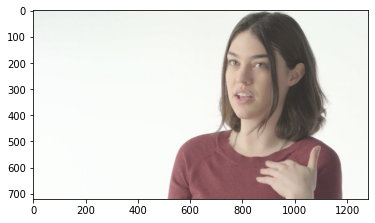

In [0]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
img_path=os.path.join(train_men_dir, '00000493.jpg')
img_path=os.path.join(train_women_dir, '00000027.jpg')
img = mpimg.imread(img_path)
plt.imshow(img)

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))     

test_generator =  test_datagen.flow_from_directory(test_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))

Found 2891 images belonging to 1 classes.
Found 1330 images belonging to 1 classes.


In [0]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),                   
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),                   
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),                    
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dropout(0.7),
    tf.keras.layers.Dense(512, activation='relu'),       
    tf.keras.layers.Dense(1, activation='sigmoid')        
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [0]:
from tensorflow.keras.optimizers import RMSprop 

model.compile(optimizer=RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])

In [0]:
history = model.fit(train_generator,
                              validation_data=test_generator,
                              steps_per_epoch=100,
                              epochs=15,
                              validation_steps=50,
                              verbose=2)

Epoch 1/15
100/100 - 95s - loss: 1.9035e-12 - accuracy: 1.0000 - val_loss: 3.4852e-12 - val_accuracy: 1.0000
Epoch 2/15
100/100 - 100s - loss: 1.3516e-12 - accuracy: 1.0000 - val_loss: 3.3851e-12 - val_accuracy: 1.0000
Epoch 3/15
100/100 - 101s - loss: 1.8931e-12 - accuracy: 1.0000 - val_loss: 4.4880e-17 - val_accuracy: 1.0000
Epoch 4/15
100/100 - 94s - loss: 7.6333e-16 - accuracy: 1.0000 - val_loss: 3.2057e-12 - val_accuracy: 1.0000
Epoch 5/15
100/100 - 95s - loss: 6.2730e-16 - accuracy: 1.0000 - val_loss: 3.1734e-12 - val_accuracy: 1.0000
Epoch 6/15
100/100 - 97s - loss: 2.7362e-12 - accuracy: 1.0000 - val_loss: 1.1718e-16 - val_accuracy: 1.0000
Epoch 7/15
100/100 - 97s - loss: 1.1555e-12 - accuracy: 1.0000 - val_loss: 2.8647e-12 - val_accuracy: 1.0000
Epoch 8/15
100/100 - 97s - loss: 1.5048e-12 - accuracy: 1.0000 - val_loss: 2.7401e-12 - val_accuracy: 1.0000
Epoch 9/15
100/100 - 97s - loss: 3.8623e-13 - accuracy: 1.0000 - val_loss: 2.7077e-12 - val_accuracy: 1.0000
Epoch 10/15
100/1

In [0]:
    import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
  path='/content/' + fn       #Save the image to content folder
  img=image.load_img(path, target_size=(150, 150))    #load the image
  
  x=image.img_to_array(img)    
  x=np.expand_dims(x, axis=0)   
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=10)    #predict the label for the image
  
  print(classes[0])     #Print the label, remember it will be either one or zero
  
  if classes[0]>0:
    print(fn + " is a women")     #print human readable label
    
  else:
    print(fn + " is a men") 

Saving Akshay.JPG to Akshay.JPG
[0.]
Akshay.JPG is a men
